In [2]:
""" =================================================
Copyright (C) 2018 Vikash Kumar
Author  :: Vikash Kumar (vikashplus@gmail.com)
Source  :: https://github.com/vikashplus/robohive
License :: Under Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.
================================================= """

import numpy as np
import gym
from gym import utils
import mujoco.viewer
import os
import time
import socket
import struct
from scipy.spatial.transform import Rotation as R
import math
from math import sin, cos, pi


def mjcb_control(model, data):

    pass
   


x=[]
def main():
    # =========== config model =========== #
    #curr_dir = os.path.dirname(os.path.abspath(__file__))

    model = mujoco.MjModel.from_xml_path('simple(1).xml')
    data = mujoco.MjData(model)

    model.vis.scale.framelength = 0.5
    model.vis.scale.framewidth = 0.02

    print( model.nq,                         # number of generalized coordinates = dim(qpos)
        model.nv,                         # number of degrees of freedom = dim(qvel)
        model.nu,                         # number of actuators/controls = dim(ctrl)
        model.na,                         # number of activation states = dim(act)
        model.nbody,                      # number of bodies
        model.nbvh,                       # number of total bounding volumes in all bodies
        model.njnt,                       # number of jomodel.
        model.ngeom,                      # number of geoms
        model.nsite,                      # number of sites
    )
    # 145 138 9 0 129 106364 121 144 2
    # 33 33 26 0 31 48605 33 57 30

    print("geom list")
    for i in range(model.ngeom):
        print(i, model.geom(i).name)

    model.opt.timestep = 0.001
    print("timestep: ", model.opt.timestep)
    
    mujoco.set_mjcb_control(mjcb_control)
    
    # =========== Visualization Loop =========== #
    with mujoco.viewer.launch_passive(model, data, show_left_ui = 1) as viewer:
        
    
        with viewer.lock():
            # 设置显示的内容
            viewer.opt.flags[mujoco.mjtVisFlag.mjVIS_CONTACTPOINT] = 0
            viewer.opt.flags[mujoco.mjtVisFlag.mjVIS_CONTACTFORCE] = 1
            viewer.opt.label = mujoco.mjtLabel.mjLABEL_CONTACTFORCE
            viewer.opt.frame = mujoco.mjtFrame.mjFRAME_BODY
            
            viewer.show_right_ui = False
            viewer.show_left_ui = False
            viewer.info = True

        # ========= 开始仿真 ========= #
        start = time.time()
        while viewer.is_running() and time.time() - start < 3000:
            
            step_start = time.time()

            # ========= 仿真一步 ========= #
            # mj_step can be replaced with code that also evaluates
            # a policy and applies a control signal before stepping the physics.
            mujoco.mj_step(model, data)

            force = np.ndarray((6, 1))
            # ========= 获取希望的数据 ========= #
            for i in range(len(data.contact)):
                # print(data.contact[i].geom1, data.contact[i].geom2)
                g1 = data.contact[i].geom1
                g2 = data.contact[i].geom2
                # if (g1 in geomIntrested.keys() or g2 in geomIntrested.keys()):
                    # print(data.contact[i].pos)
                    # print(mujoco.mj_id2name(model, mujoco.mjtObj.mjOBJ_GEOM, g1))

                mujoco.mj_contactForce(model, data, i, force)
                print(force)
                # print(force[0, 0:2])
                x.append(data.geom(4).xpos)
                print(data.geom(4).xpos)
                    
            
            # ========= 更新显示 ========= #
            # Pick up changes to the physics state, apply perturbations, update options from GUI.
            viewer.sync()

            # Rudimentary time keeping, will drift relative to wall clock.
            time_until_next_step = model.opt.timestep - (time.time() - step_start)
            if time_until_next_step > 0:
                time.sleep(time_until_next_step)

        # 5 最后关闭客户端套接字连接
        # tcp_client_1.close()


if __name__ == "__main__":
    main()

ValueError: Error: engine error: Python exception raised

In [5]:
import mujoco
import mediapy as media
import matplotlib.pyplot as plt

import time
import itertools
import numpy as np


""

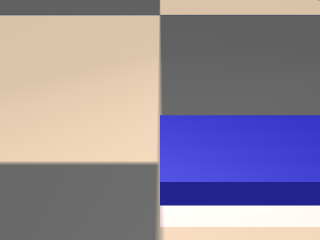

positions [0. 0. 0.]
velocities [0. 0. 0.]
name of geom 1:  bb2
name of body 0:  b2
name of body 0:  <_MjModelBodyViews
  dofadr: array([2])
  dofnum: array([1])
  geomadr: array([4])
  geomnum: array([1])
  id: 4
  inertia: array([1.20833333e-05, 1.20833333e-05, 2.08333333e-05])
  invweight0: array([20.,  0.])
  ipos: array([0., 0., 0.])
  iquat: array([1., 0., 0., 0.])
  jntadr: array([2])
  jntnum: array([1])
  mass: array([0.05])
  mocapid: array([-1])
  name: 'b2'
  parentid: array([3])
  pos: array([0., 0., 0.])
  quat: array([1., 0., 0., 0.])
  rootid: array([3])
  sameframe: array([1], dtype=uint8)
  simple: array([2], dtype=uint8)
  subtreemass: array([0.05])
  user: array([], dtype=float64)
  weldid: array([4])
>


In [6]:
model = mujoco.MjModel.from_xml_path('simple(1).xml')
renderer = mujoco.Renderer(model)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, camera="closeup")
media.show_image(renderer.render())
print('positions', data.qpos)
print('velocities', data.qvel)
print('name of geom 1: ', model.geom(4).name)
print('name of body 0: ', model.body(4).name)
print('name of body 0: ', model.body(4))

In [7]:
duration = 7    # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetDataKeyframe(model, data, 0)  # Reset the state to keyframe 0
while data.time < duration:
  mujoco.mj_step(model, data)
  if len(frames) < data.time * framerate:
    renderer.update_scene(data, "closeup")
    pixels = renderer.render()
    frames.append(pixels)

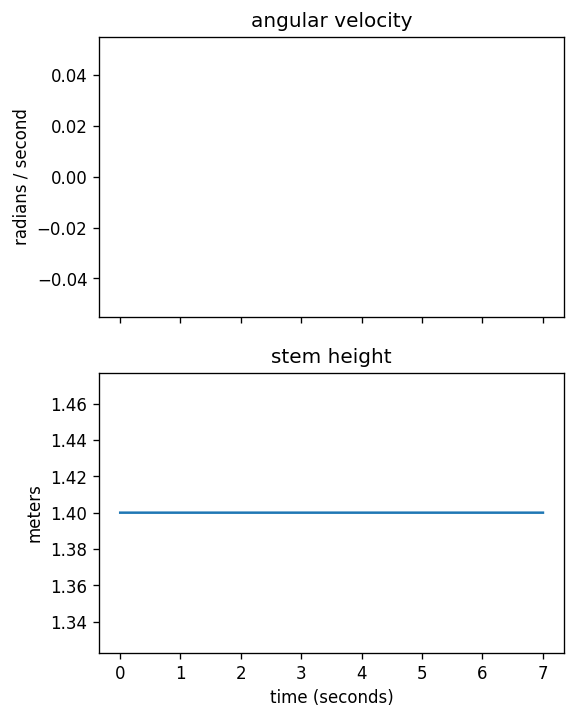

In [10]:
PERTURBATION = 1e-7
SIM_DURATION = 10 # seconds
NUM_REPEATS = 8
timevals = []
angular_velocity = []
stem_height = []
# Simulate and save data
mujoco.mj_resetDataKeyframe(model, data, 0)
while data.time < duration:
  mujoco.mj_step(model, data)
  timevals.append(data.time)
  data.ctrl[0] = 100 # root joint velocity
  angular_velocity.append(data.qvel[3:6].copy())
  stem_height.append(model.body(3).pos[0]);
dpi = 120
width = 600
height = 800
figsize = (width / dpi, height / dpi)
_, ax = plt.subplots(2, 1, figsize=figsize, dpi=dpi, sharex=True)

ax[0].plot(timevals, angular_velocity)
ax[0].set_title('angular velocity')
ax[0].set_ylabel('radians / second')

ax[1].plot(timevals, stem_height)
ax[1].set_xlabel('time (seconds)')
ax[1].set_ylabel('meters')
_ = ax[1].set_title('stem height')

AttributeError: 'MjModel' object has no attribute 'bvh_geomid'